In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import normal
from scipy.stats import norm

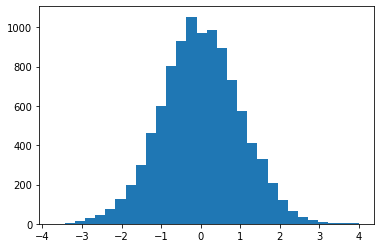

In [5]:
sample =  normal(size = 10000) # generador de aleatorios de numpy
plt.hist(sample, bins = 30)
plt.show()

### Estimacion parametrica

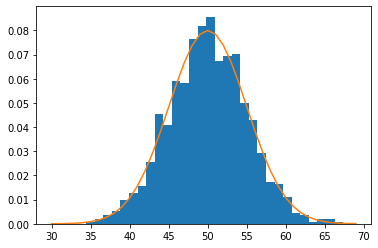

In [6]:
sample = normal(loc=50, scale=5, size=1000) # miu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist =  norm(mu, sigma)
values = [value for value in range(30,70)] #creo los x
probabilidades =  [dist.pdf(value) for value in values] #calculo la prob para cada normal
plt.hist(sample, bins = 30, density=True) #que significa denisty??
plt.plot(values, probabilidades)
plt.show()

# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html

In [12]:
from numpy import hstack #hstack es para juntar varios arreglos - concat
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian') #bandwidth es el suavizado, kernel es la distribución
sample = sample.reshape((len(sample),1)) #los x deben ir como forma de filas (es decir [[], [], ...])
model.fit(sample)

KernelDensity(bandwidth=2)

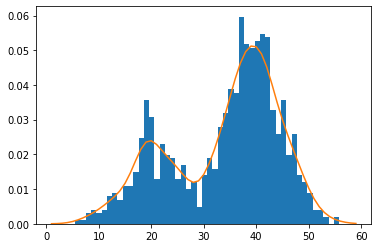

In [16]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica // Compute the log-likelihood of each sample under the model.
probabilities = np.exp(probabilities)  # inversión de probabilidad - las vuelve a su estado real de nuevo

plt.hist(sample, bins=50, density=True) 
plt.plot(values[:], probabilities)
plt.show()